# DATA SCIENCE CAREER GUIDANCE SYSTEM

In this project the data is scrapped from simpyhired.com for Data Science jobs and careerbliss.com for respective Company reviews which is intregrrated together in a single dataset stored in csv format. The data collected is used to analyze the job description and company reviews through sentiment analysis to give a recommendation to the users about probalility of their career growth if they join the particular company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#library for text pre-processing
import string
string.punctuation
import re
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams
import datetime as dt
from datetime import date
import calendar

# Libraries for Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

C:\Users\Raghul Devaraj\anaconda3\envs\env_dlib\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option("display.max_colwidth", -1)
df = pd.read_csv('engine_x_final.csv')

In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job_title             390 non-null    object 
 1   company_name          390 non-null    object 
 2   company_location      390 non-null    object 
 3   job_type              325 non-null    object 
 4   posted_date           143 non-null    object 
 5   qualification         390 non-null    object 
 6   benefits              390 non-null    object 
 7   description           390 non-null    object 
 8   average_rating_list   172 non-null    float64
 9   company_culture       172 non-null    float64
 10  growth_opportunities  172 non-null    float64
 11  people_you_work_with  172 non-null    float64
 12  person_you_work_for   172 non-null    float64
 13  rewards_you_receive   172 non-null    float64
 14  suppport_you_get      172 non-null    float64
 15  way_you_work          1

In [5]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

Number of observations = 390

Number of features = 18

Number of Numerical features = 9

Number of categorical features = 9

In [6]:
df.head()

Job_title  \
0  DATA SCIENTIST                                                      
1  Associate Architect - Fullstack (Python/ Ruby and Angular)          
2  Software Engineer                                                   
3  #RestartWithInfosys-EAIS-Java/Springboot/Microservices Consultant   
4  Data Annotator                                                      

               company_name      company_location   job_type   posted_date  \
0  PUMA                      Bengaluru, Karnataka  NaN        2 days ago     
1  Clarivate                 Bengaluru, Karnataka  Full-time  NaN            
2  Dell Technologies         India                 Full-time  8 days ago     
3  Infosys Limited           Bengaluru, Karnataka  NaN        21 hours ago   
4  Conxai Technologies GmbH  Bengaluru, Karnataka  Full-time  NaN            

                                                                                                 qualification  \
0  ['Azure', 'SQL', 'Spark', 'Performance marketing', 'Deep learning', "Bachelor's degree", "Master's degree"]   
1  ['React', 'Continuous integration', 'SQL', '.NET', 'CI/CD', "Bachelor's degree", "Master's degree"]           
2  ['DNS', 'VMWare', 'ESXi', 'Software troubleshooting', 'TCP']                                                  
3  ['APIs', 'Microservices', 'Java', "Bachelor's degree", "Master's degree"]                                     
4  ['Deep learning', 'Software deployment', 'PyTorch', 'Python', 'Data science', "Bachelor's degree"]            

        benefits  \
0  Not mentioned   
1  Not mentioned   
2  Not mentioned   
3  Not mentioned   
4  Not mentioned   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [7]:
df.describe()

,average_rating_list,company_culture,growth_opportunities,people_you_work_with,person_you_work_for,rewards_you_receive,suppport_you_get,way_you_work,work_setting
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,4.011628,3.953488,3.526744,4.420349,4.205233,3.793023,3.987209,4.122093,4.059302
std,0.373515,0.449743,0.500976,0.362728,0.390870,0.477516,0.488295,0.486881,0.479492
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.975000,3.800000,3.500000,4.400000,4.200000,3.600000,3.900000,4.100000,4.000000
50%,4.000000,3.950000,3.600000,4.400000,4.200000,3.900000,4.000000,4.200000,4.000000
75%,4.200000,4.300000,3.800000,4.500000,4.300000,4.125000,4.300000,4.200000,4.300000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Visualization of Null values

<AxesSubplot:>

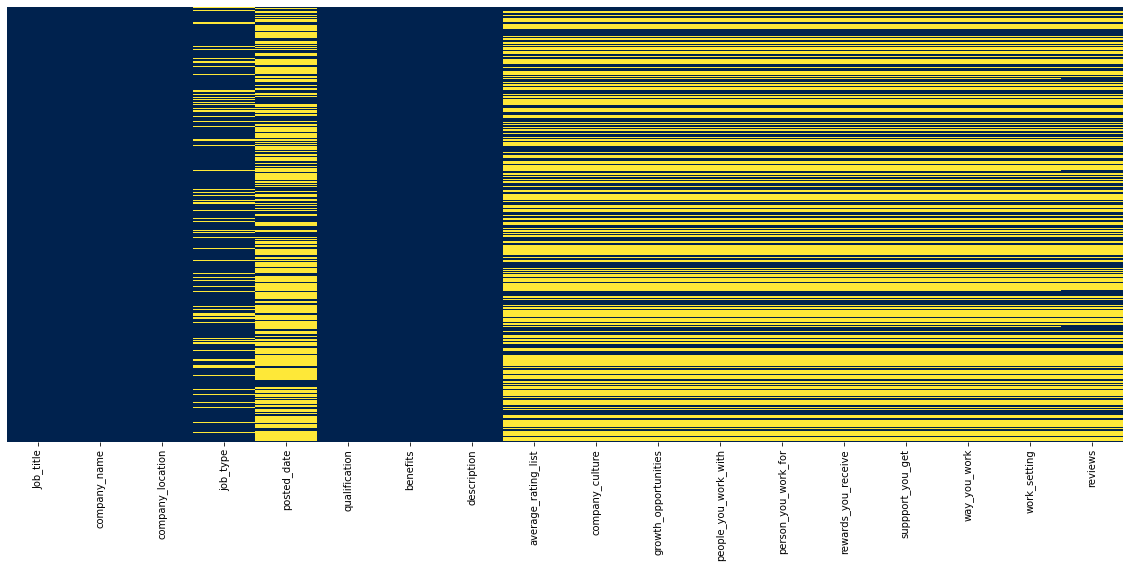

In [8]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [9]:
df.isnull().sum()

Job_title               0  
company_name            0  
company_location        0  
job_type                65 
posted_date             247
qualification           0  
benefits                0  
description             0  
average_rating_list     218
company_culture         218
growth_opportunities    218
people_you_work_with    218
person_you_work_for     218
rewards_you_receive     218
suppport_you_get        218
way_you_work            218
work_setting            218
reviews                 214
dtype: int64

In [10]:
title = ['scien', 'Architect', 'Engineer', 'analy', 'Consul', 'Developer', 'Manager', 'Research', 'intern']

dict_title = {}

for i in title:
    count = 0
    for job_tile in df['Job_title']:
        if i.lower() in job_tile.lower():
            count+=1
    dict_title[i]=count
        
percentage = list((np.array(list(dict_title.values()))/390) * 100)        

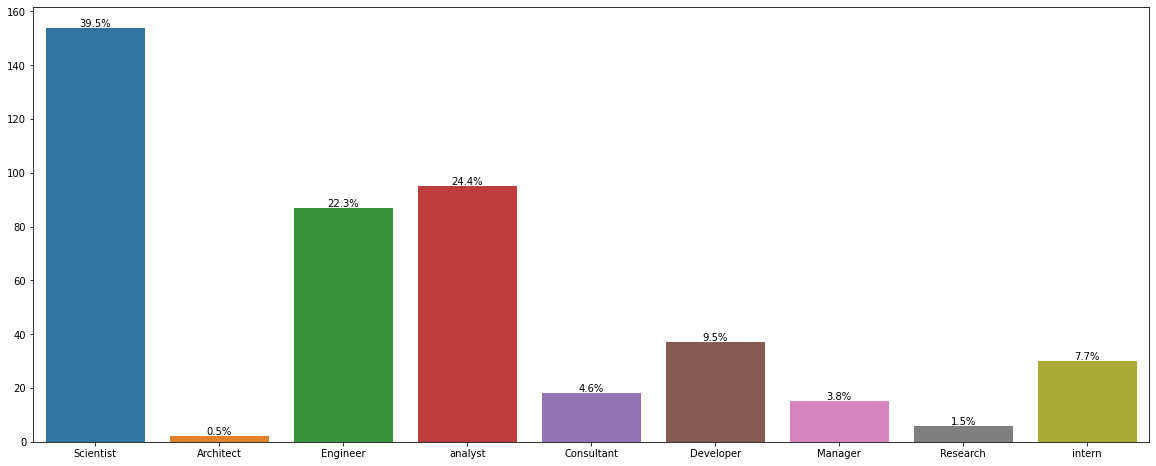

In [11]:
label = ['Scientist', 'Architect', 'Engineer', 'analyst', 'Consultant', 'Developer', 'Manager', 'Research', 'intern']
value = list(dict_title.values())
plt.figure(figsize=(20, 8))
#sns.barplot(x=label, y=value)

ax = sns.barplot(x=label, y=value, palette='tab10')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+0.5
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

Jobs with Scientist label are predominant amont all other jobs. Nearly 39.5% jobs are in scientist/science domain since it is the booming domain and Data Scientists are paid the highest among all other designations. Followed by Scientists, Analysts/Analysis job occurs. 24% jobs are in Analyst roles since Analysts are second highest paid followed by Data scientists. Architect domain is least of 0.5% 

In [12]:
df['company_location']=df['company_location'].replace("India", "India, India")
df['company_location']=df['company_location'].replace("Remote", "Remote, Remote")
df['company_location']=df['company_location'].replace("Maharashtra", "Maharashtra, Maharashtra")

## Feature Engineering

### Feature Extraction

In [13]:
df.insert(3, "City", df['company_location'].apply(lambda x :x.split(',')[-2:][0]))
df.insert(4, "State", df['company_location'].apply(lambda x :x.split(',')[-2:][1]))

City and state are extracted from company_location

In [14]:
df.loc[df['Job_title'].map(lambda x : 'scien' in x.lower()), 'Designation']="Scientist"
df.loc[df['Job_title'].map(lambda x : 'archi' in x.lower()), 'Designation']="Architect"
df.loc[df['Job_title'].map(lambda x : 'engineer' in x.lower()), 'Designation']="Engineer"
df.loc[df['Job_title'].map(lambda x : 'analy' in x.lower()), 'Designation']="Analyst"
df.loc[df['Job_title'].map(lambda x : 'consul' in x.lower()), 'Designation']="Consultant"
df.loc[df['Job_title'].map(lambda x : 'develop' in x.lower()), 'Designation']="Developer"
df.loc[df['Job_title'].map(lambda x : 'manager' in x.lower()), 'Designation']="Manager"
df.loc[df['Job_title'].map(lambda x : 'research' in x.lower()), 'Designation']="Research"
df.loc[df['Job_title'].map(lambda x : 'intern' in x.lower()), 'Designation']="Intern"
df.loc[df['Job_title'].map(lambda x : 'admin' in x.lower()), 'Designation']="Administrator"
df.loc[df['Job_title'].map(lambda x : 'associat' in x.lower()), 'Designation']="Associate"

Designations are extracted from Job Titles

In [15]:
df['Designation'] = df['Designation'].fillna('Other')

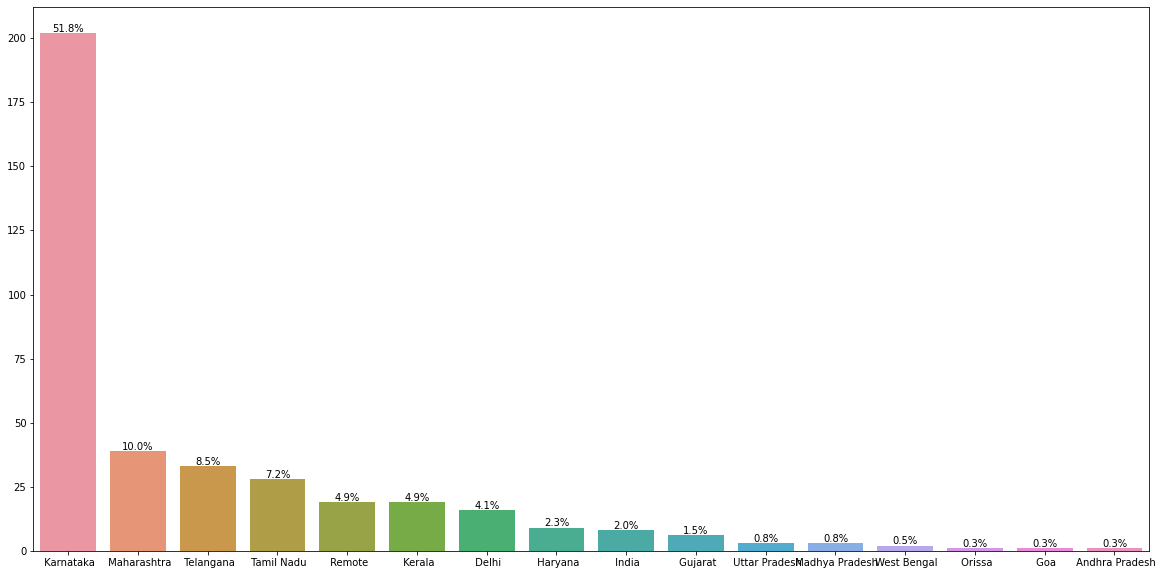

In [16]:
percentage = list(np.round((df['State'].value_counts().values)/390 * 100, 2))

plt.figure(figsize=(20, 10))
ax = sns.barplot(y=df['State'].value_counts().values, x=df['State'].value_counts().index)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+0.5
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

From the visualization we can infer that Data Science jobs are found more in Karnataka. 51% Jobs are posted from Karnataka. Orissa, Goa & Andhra pradesh has 0.3% of job postings

Since Karnataka has higher job posting we can do a deep analayis with respect to Karnataka

In [17]:
df['State']=df['State'].apply(lambda x : x.strip())
df['City']=df['City'].apply(lambda x:x.strip())

<AxesSubplot:>

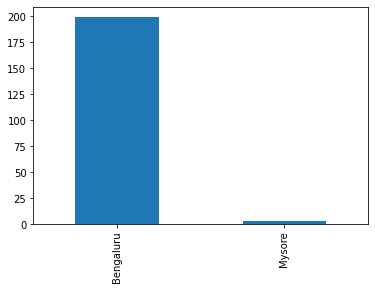

In [18]:
df[df['State']=='Karnataka']['City'].value_counts().plot(kind='bar')

In karnataka, Bengaluru and Mysore has job posting in which more job postings are in Bangalore since it is the electronic city

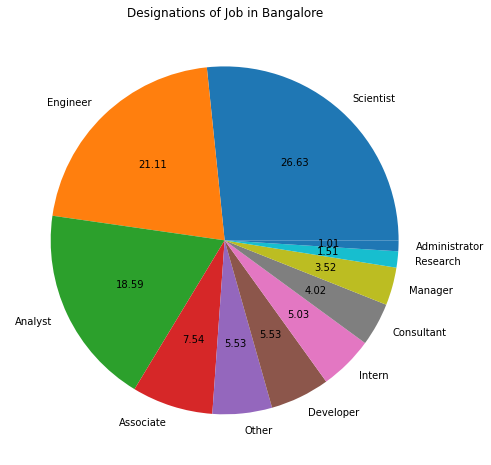

In [19]:
plt.figure(figsize=(20, 8))
label = df[df['City']=='Bengaluru']['Designation'].value_counts().index
values = df[df['City']=='Bengaluru']['Designation'].value_counts().values
plt.title('Designations of Job in Bangalore')
plt.pie(x=values, labels=label, autopct='%.2f');

In [20]:
df['job_type'] = df['job_type'].fillna("Not mentioned")
df['posted_date'] = df['posted_date'].fillna("Not mentioned")

In [21]:
df['description'] = df['description'].apply(lambda x:x.replace('\n', ' '))

In [22]:
df['description'] = df['description'].apply(lambda x:' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))


In [23]:
df['description'] = df['description'].str.lower()

In [24]:
df.insert(10, 'desc_tokenized', df['description'].apply(lambda x:word_tokenize(x)))

In [25]:
stop = stopwords.words('english')
df.insert(11, 'no_stopwords', df['desc_tokenized'].apply(lambda x:' '.join([word for word in x if word not in stop])))

In [26]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text.split()]
    return stem_text

In [27]:
df.insert(12, 'desc_stemmed', df['no_stopwords'].apply(lambda x: stemming(x)))

In [28]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    return lemm_text

In [29]:
df.insert(13, 'desc_lemmatized', df['no_stopwords'].apply(lambda x:lemmatizer(x)))

In [30]:
df.insert(14, 'most_common_words', df['desc_lemmatized'].apply(lambda x : collections.Counter(x).most_common(1)))

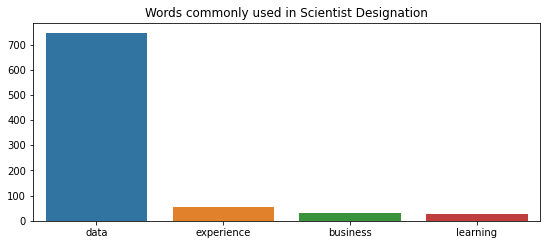

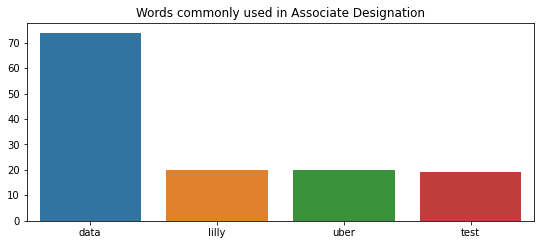

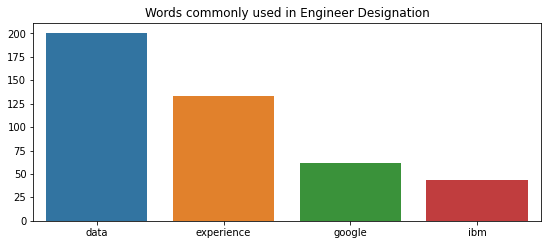

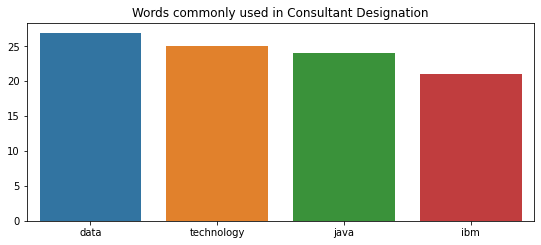

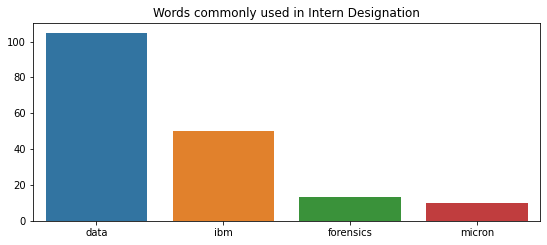

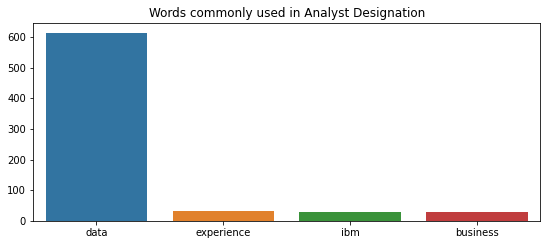

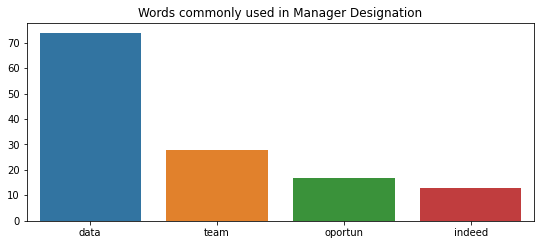

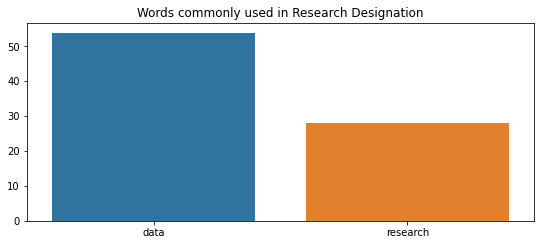

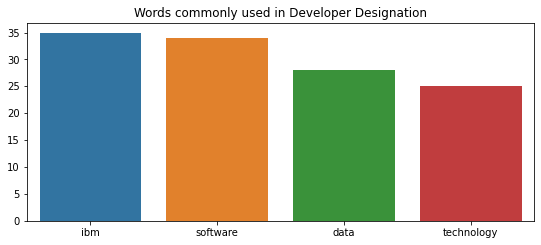

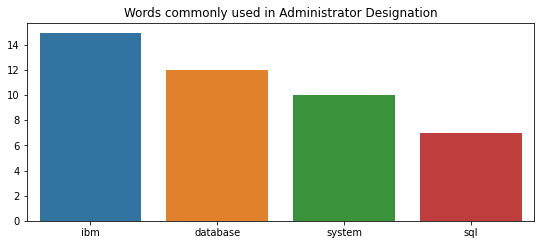

In [31]:
for des in ['Scientist', 'Associate', 'Engineer', 'Consultant','Intern', 'Analyst', 'Manager', 'Research', 'Developer','Administrator']:
    sub_plot_count = 1
    dict_data = {}
    for i in df[df['Designation']==des]['most_common_words']:
        if i[0][0] in dict_data.keys():
            dict_data[i[0][0]] += i[0][1]
        else:
            dict_data[i[0][0]] = i[0][1]
    sorted_x = sorted(dict_data.items(), key=lambda x: x[1], reverse=True)
    sorted_dict = collections.OrderedDict(sorted_x)
    key = []
    value = []
    n= 1
    for i, j in sorted_dict.items():
        key.append(i)
        value.append(j)
        n += 1
        if n==5:
            break
    plt.figure(figsize=(20, 8))
    plt.subplot(2, 2, sub_plot_count+1)
    title = "Words commonly used in " + des + " Designation"
    plt.title(title)
    sns.barplot(key, value)
    sub_plot_count +=1

### Filling missing values of ratings by mean of each Designation

In [32]:
for i in ['average_rating_list', 'company_culture','growth_opportunities', 'people_you_work_with', 'person_you_work_for','rewards_you_receive', 'suppport_you_get', 'way_you_work','work_setting']:
    df[i] = df[i].fillna(df.groupby('Designation')[i].transform('mean'))
    df[i] = df[i].fillna(np.mean(df[i]))

In [33]:
df['final_rating'] = np.round(df.mean(numeric_only=True, axis=1), 1)

In [34]:
df['temp_rating'] = np.where(df['final_rating']>=4.0, "Good", "Average")

In [35]:
df['reviews'].fillna(df['temp_rating'], inplace=True)
del df['temp_rating']

In [36]:
df[['reviews', 'final_rating']].head(10)

,reviews,final_rating
0,"Ensure promotions are given to people who deserve it, change the loyalty gathering process, and make sure all higher ups work in teh field so they can know what works in reality and what does not.",3.6
1,"Really great company who puts their employees first. Everyone is so friendly and helpful to their coworkers. The company is great at what it does, helping libraries to access the content they'd like to make available to their patrons. My colleagues were very talented and helped me to build a skillset in the IT field.",4.8
2,"Don't be so afraid of coming up with new things and seeing what the development staff can do! If we hadn't broken a few of their IT mandates in 1995, there would have been no support.dell.com worth talking about!!!! Also, don't have all of the developers in IT and crushed by budgets and IT timelines - get them out into the business units so they can be more effective and react faster to changing markets!",3.9
3,I have worked for Infosys for 10 years in various roles and at various locations. The company has a wealth of resources which can be its strength when you are starting in the company. The large size of the company is a drawback for individual growth once an employee reaches middle-management in the company. I like to work in an environment where processes aid the decision. Having a large company with multiple hierarchy levels though drowns the work into processes and slow down productivity.,4.0
4,Good,4.0
5,Average,3.9
6,"Stay away from information security. The top level management of this team is causing talent to drop like flies. There is a VP that brought fear-based management style to the organization that has great influencing power at the very top. The VP is the de-facto CISO that runs information security - the actual CISO follows his lead! This has caused strife and there is no unity between teams under the infosec umbrella. Many have been unjustifiably terminated. Many have already have jumped ship in droves. There are a lot of infosec positions currently open at TU. This is not to build up the team, but to back fill open positions. HR is either blind or not paying attention to what is going on because nothing seems to be getting done. Get rid of the bad apples at the top, they are ruining the organization! You've been warned!",4.0
7,Average,3.9
8,"Wake up, see what is in front of your face! You have some good people. The rest are good to smoke cigs and talk, then they say they cannot make money. Try working instead of talking!",3.0
9,"Trust the abilities of the experts you hired to do their job, instead of dictating orders from Korea. Respect our personal time and give us the resources to work smarter, not harder. Money doesn't buy loyalty, reward your employees by recognizing their value to the company. Stop playing favorites!!!",4.0


### Performing Sentiment Analysis on reviews column 

In [37]:
sid_obj = SentimentIntensityAnalyzer()
polarity = []
for i in df["reviews"]:
    polarity.append(sid_obj.polarity_scores(i)['compound'])
polarity = np.array(polarity)
df['polarity']=polarity

In [38]:
col         = 'polarity'
conditions  = [df[col] > 0.5, df[col] == 0.5, df[col] < 0.5]
choices     = [ "Positive", 'Neutral', 'Negative' ]
    
df["Sentiment"] = np.select(conditions, choices, default=np.nan)

In [39]:
df.iloc[:, -5:]

,reviews,Designation,final_rating,polarity,Sentiment
0,"Ensure promotions are given to people who deserve it, change the loyalty gathering process, and make sure all higher ups work in teh field so they can know what works in reality and what does not.",Scientist,3.6,0.8126,Positive
1,"Really great company who puts their employees first. Everyone is so friendly and helpful to their coworkers. The company is great at what it does, helping libraries to access the content they'd like to make available to their patrons. My colleagues were very talented and helped me to build a skillset in the IT field.",Associate,4.8,0.9757,Positive
2,"Don't be so afraid of coming up with new things and seeing what the development staff can do! If we hadn't broken a few of their IT mandates in 1995, there would have been no support.dell.com worth talking about!!!! Also, don't have all of the developers in IT and crushed by budgets and IT timelines - get them out into the business units so they can be more effective and react faster to changing markets!",Engineer,3.9,0.6143,Positive
3,I have worked for Infosys for 10 years in various roles and at various locations. The company has a wealth of resources which can be its strength when you are starting in the company. The large size of the company is a drawback for individual growth once an employee reaches middle-management in the company. I like to work in an environment where processes aid the decision. Having a large company with multiple hierarchy levels though drowns the work into processes and slow down productivity.,Consultant,4.0,0.8176,Positive
4,Good,Other,4.0,0.4404,Negative
...,...,...,...,...,...
385,You should find a way to compensate employees who give the extra mile to avoid the losing of enthusiasm of the employee to move forward with the company. Also the company should give (minimum) a course of human relationship tuition to the supervisors and managers.,Analyst,3.7,-0.2263,Negative
386,Good,Associate,4.1,0.4404,Negative
387,Good,Engineer,4.1,0.4404,Negative
388,Good,Engineer,4.1,0.4404,Negative


In [40]:
df.columns

Index(['Job_title', 'company_name', 'company_location', 'City', 'State',
       'job_type', 'posted_date', 'qualification', 'benefits', 'description',
       'desc_tokenized', 'no_stopwords', 'desc_stemmed', 'desc_lemmatized',
       'most_common_words', 'average_rating_list', 'company_culture',
       'growth_opportunities', 'people_you_work_with', 'person_you_work_for',
       'rewards_you_receive', 'suppport_you_get', 'way_you_work',
       'work_setting', 'reviews', 'Designation', 'final_rating', 'polarity',
       'Sentiment'],
      dtype='object')

In [41]:
degree_list = []
df['qualification'].str.contains('')
for i in df['qualification']:
    degree_sub_list = []
    for j in i[1:-1].split(','):
        if 'degree' in j.lower():
            degree_sub_list.append(j)
    else:
        degree_list.append("Not mentioned")
    degree_list.append(degree_sub_list)
    

In [42]:
#np.where(df['qualification'].str.contains('degree'), "Yes", "No")
df[df['qualification'].str.contains('degree')]

word_list = ["Bachelor's degree", "Master's degree", "Doctoral degree"]
df['degree'] = df.qualification.str.extract('({})'.format('|'.join(word_list)), flags=re.IGNORECASE, expand=False).str.lower().fillna('Not mentioned')

In [52]:
for i in ['average_rating_list', 'company_culture', 'growth_opportunities', 'people_you_work_with', 'person_you_work_for', 'rewards_you_receive', 'suppport_you_get', 'way_you_work', 'work_setting', 'final_rating']:
    df[i] = np.round(df[i], 1)  

In [54]:
df[['Job_title', 'company_name', 'City', 'State', 'job_type', 'qualification', 'average_rating_list', 'company_culture', 'growth_opportunities', 'people_you_work_with', 'person_you_work_for', 'rewards_you_receive', 'suppport_you_get', 'way_you_work', 'work_setting', 'Designation', 'final_rating', 'polarity',
       'Sentiment']].to_csv('dashbaord_data.csv')